In [2]:
# adding modules folder to the path
import sys
sys.path.append('./modules')

# importing constants defined for this project
from constants import *

from IPython.display import Image
import pandas as pd
import altair as alt

def plot_interactive_graph(data, dropdown=[], y_label='', main_title=''):
    """
    This function uses altair lib to plot interactive graph based on the input.
    
    Parameters:
        data: Data frame
        dropdown: List of items to filter the data displayed in the graph
        y_label: Y label text
        main_title: Title of the graph
    """
    input_dropdown = alt.binding_select(options=dropdown, name='Item')

    select_item = alt.selection_single(
        name='Select Import Item', fields=['Item'], init={'Item': dropdown[0]},
        bind=input_dropdown)

    alt.Chart(data, title=main_title).mark_point(filled=True).encode(
        alt.X('Year', scale=alt.Scale(zero=False)),
        alt.Y('Value', scale=alt.Scale(zero=False), title=y_label),
        alt.Size('Value:Q'),
        alt.Color('Area:N'),
        alt.Order('Value:Q', sort='descending'),
        tooltip='Value:N'
    ).add_selection(select_item).transform_filter(select_item).display()

# 1. Overview

This Jupyter notebook is a light version of the DataPrepVis notebook and presents the main graphs generated from the EDA steps performed in this project.

It also shows an interactive graph created using Altair with the top 10 import products in Ireland an other countries.

It can be seen as a web page by using Voila tool via terminal, by running the following command, or via the Jupyter extension.

```
voila DataPrepVisDashboard.ipynb
```

# 2. Organic Farming Area

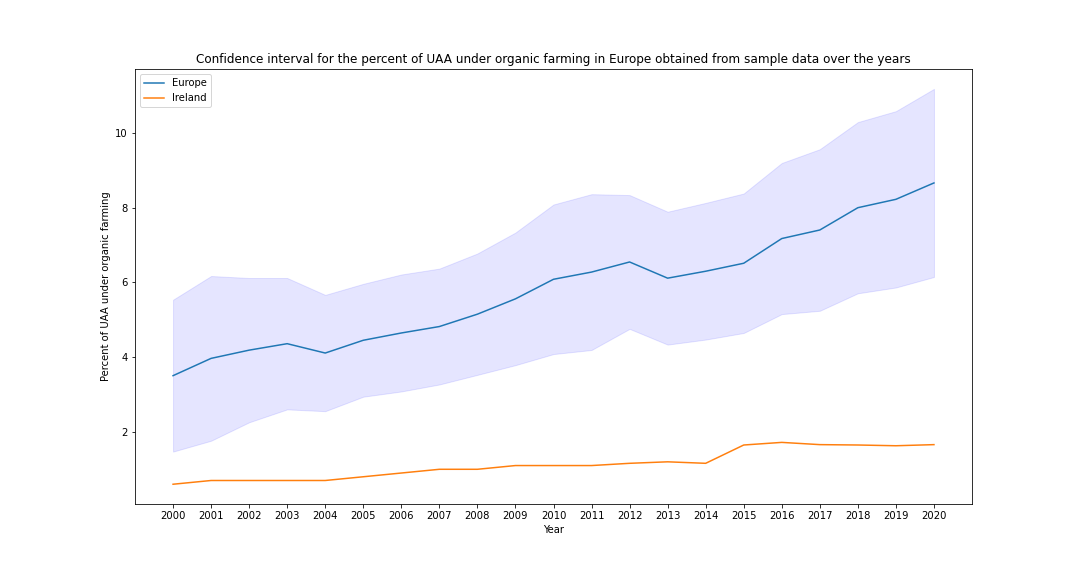

In [3]:
Image(filename=join(IMAGES_FOLDER, GRAPH_CONF_INTERVAL))

# 3. Crops and Livestock Products Import/Export

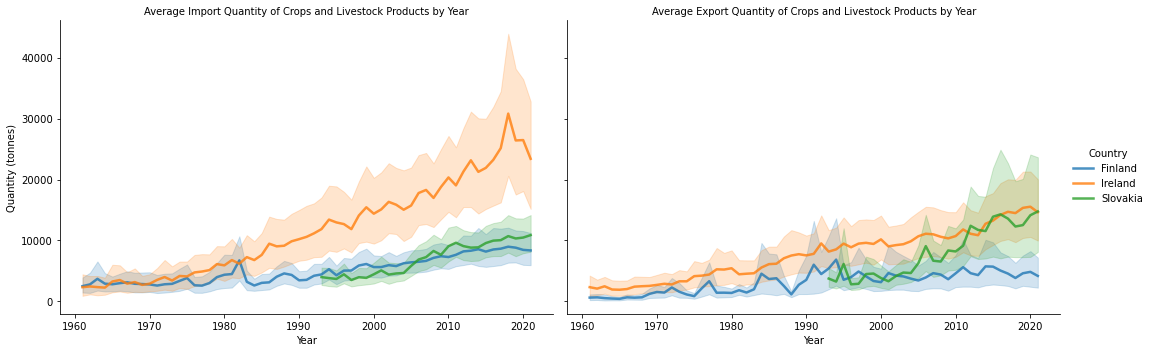

In [4]:
Image(filename=join(IMAGES_FOLDER, GRAPH_IMP_EXP_QTT))

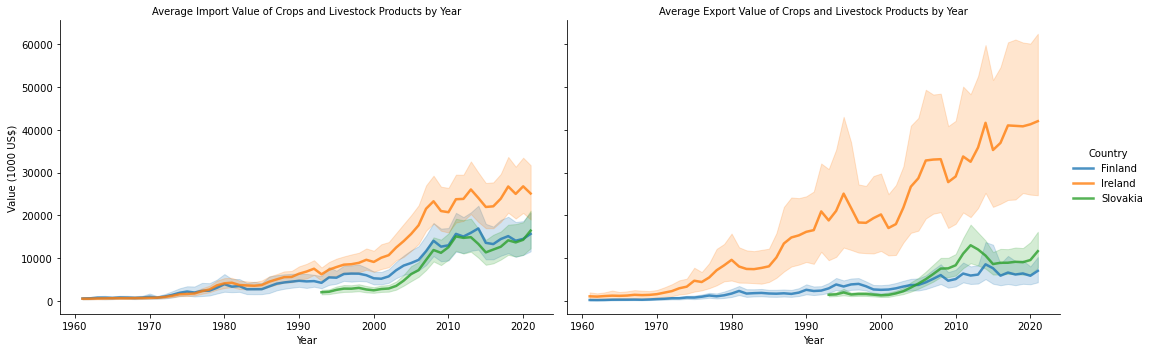

In [5]:
Image(filename=join(IMAGES_FOLDER, GRAPH_IMP_EXP_VAL))

In [6]:
# getting the top 10 items val dataset
top_10_items_data_val = pd.read_csv(join(DATA_PREP_FOLDER, IMP_DATASET_TOP10_VAL), encoding='utf-8')

# getting the top 10 items qtt dataset
top_10_items_data_qtt = pd.read_csv(join(DATA_PREP_FOLDER, IMP_DATASET_TOP10_QTT), encoding='utf-8')

# getting top 10 items ireland
top_10_items_ire = list(top_10_items_data_qtt['Item'].unique())

# plotting an interactive graph with the quantity of the top import products
plot_interactive_graph(top_10_items_data_qtt, top_10_items_ire, 'Quantity (tonnes)', 'Top 10 most imported crops and livestock products in Ireland compared with other countries (Quantity in Tonnes)')

# plotting an interactive graph with the value of the top import products
plot_interactive_graph(top_10_items_data_val, top_10_items_ire, 'Value (1000 US$)', 'Top 10 most imported crops and livestock products in Ireland compared with other countries (Value in 1000 US$)')

alt.Chart(...)

alt.Chart(...)

# 4. Food Price Inflation

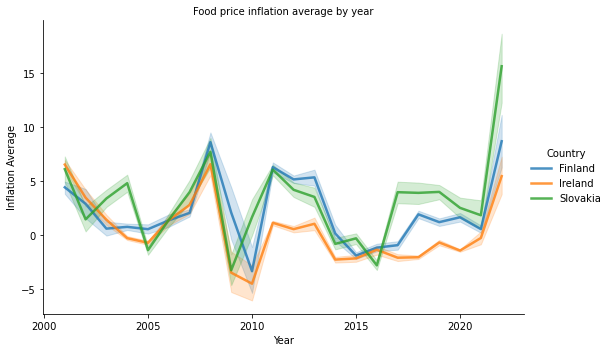

In [7]:
Image(filename=join(IMAGES_FOLDER, GRAPH_FOOD_PRICE_INF))

# 5. Twitter Dataset

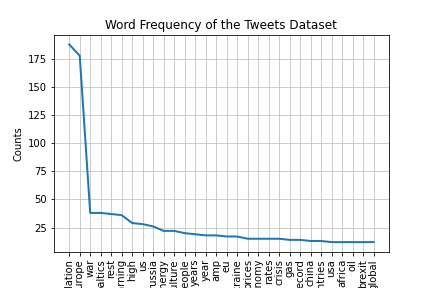

In [8]:
Image(filename=join(IMAGES_FOLDER, GRAPH_WORD_FREQ))

In [ ]:
Image(filename=join(IMAGES_FOLDER, TWEETS_WORD_CLOUD))